<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/Clustering_airlines_Anisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement of East AirLines

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
EA = pd.read_excel("/content/EastWestAirlines.xlsx",'data')
EA.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [5]:
EA.shape

(3999, 12)

In [6]:
EA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
EA.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
EA = EA.rename({'ID#':'ID','Award?':'Award'},axis=1)
EA

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
EA.corr()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


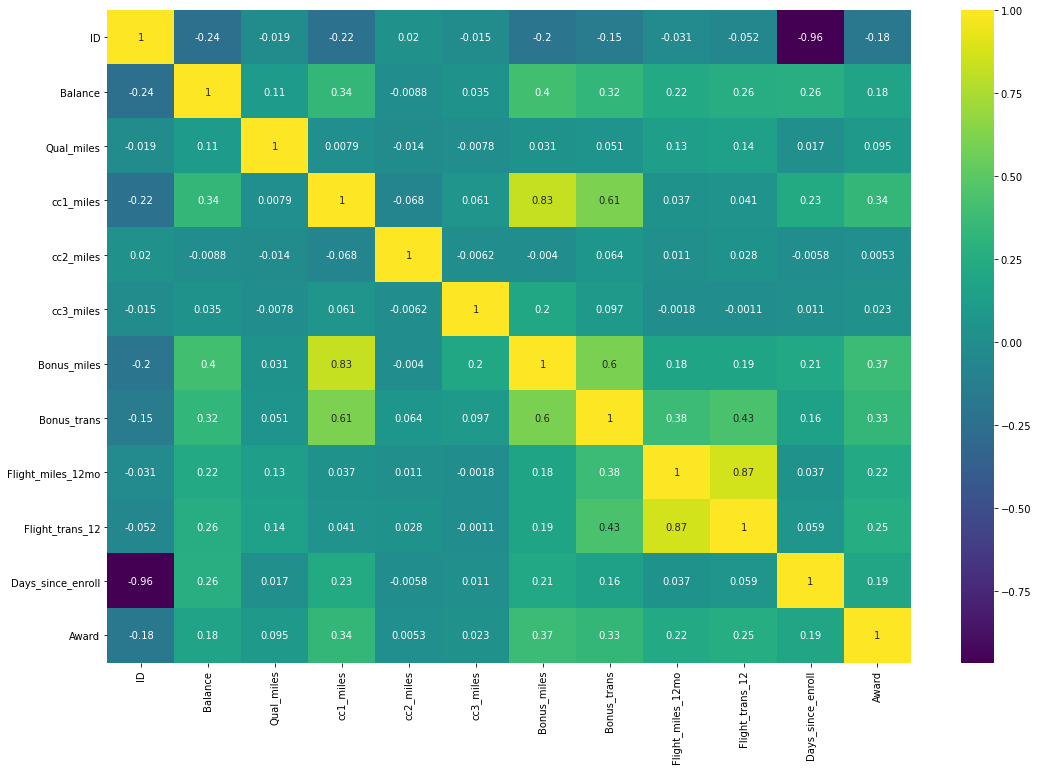

In [11]:
import seaborn as sns
plt.figure(figsize=(18,12))
sns.heatmap(EA.corr(),annot=True,cmap='viridis')

In [12]:
EA.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

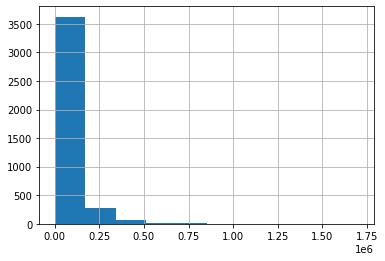

In [13]:
EA['Balance'].hist()

In [14]:
EA['Balance'].describe()

count    3.999000e+03
mean     7.360133e+04
std      1.007757e+05
min      0.000000e+00
25%      1.852750e+04
50%      4.309700e+04
75%      9.240400e+04
max      1.704838e+06
Name: Balance, dtype: float64

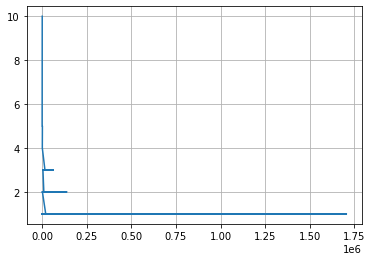

In [17]:
EA['Balance'].value_counts().plot(grid=True)

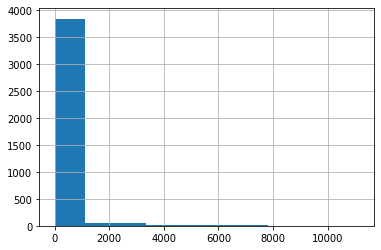

In [18]:
EA['Qual_miles'].hist(grid= True)

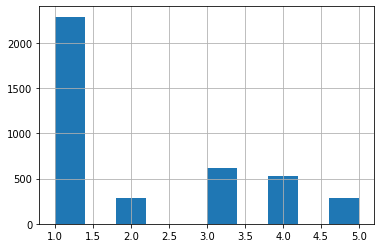

In [19]:
EA['cc1_miles'].hist()

In [20]:
EA['cc1_miles'].value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

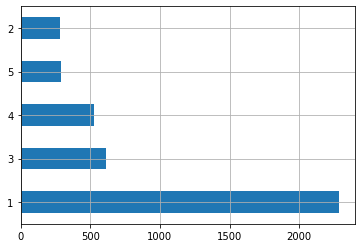

In [21]:
EA['cc1_miles'].value_counts().plot(kind='barh',grid=True)

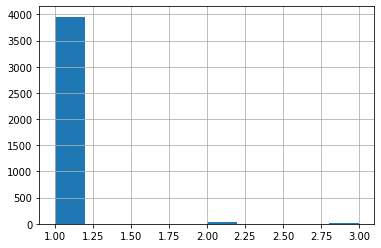

In [22]:
EA['cc2_miles'].hist()

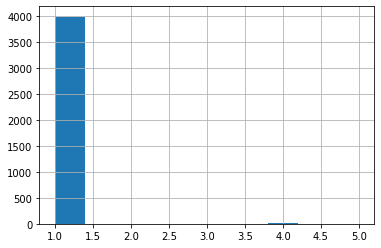

In [23]:
EA['cc3_miles'].hist()

In [24]:
EA['cc3_miles'].value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

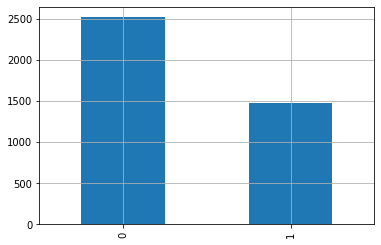

In [25]:
EA['Award'].value_counts().plot(kind='bar',grid=True)

In [26]:
EA['Award'].value_counts()

0    2518
1    1481
Name: Award, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


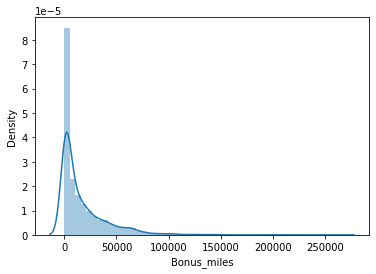

In [27]:
sns.distplot(EA['Bonus_miles'])

#Scatter plot and correlation analysis

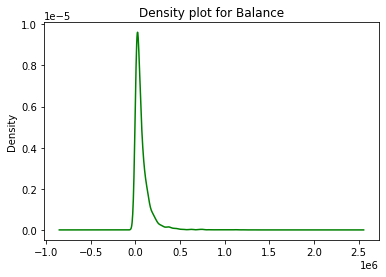

In [28]:
EA.Balance.plot.density(color='green')
plt.title('Density plot for Balance')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


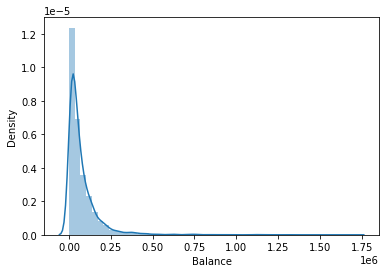

In [29]:
sns.distplot(EA['Balance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


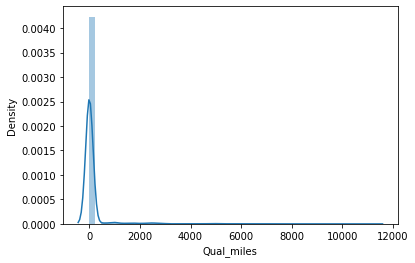

In [30]:
sns.distplot(EA['Qual_miles'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


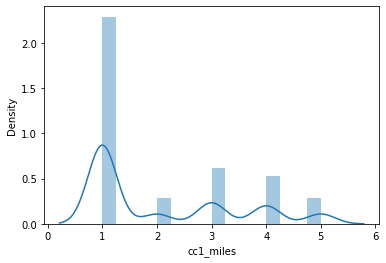

In [31]:
sns.distplot(EA['cc1_miles'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


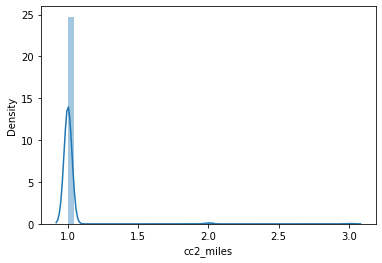

In [32]:
sns.distplot(EA['cc2_miles'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


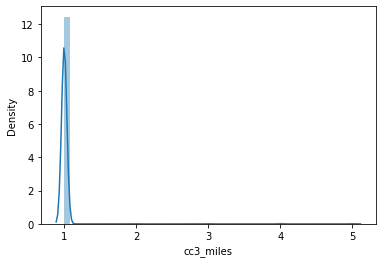

In [33]:
sns.distplot(EA['cc3_miles'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


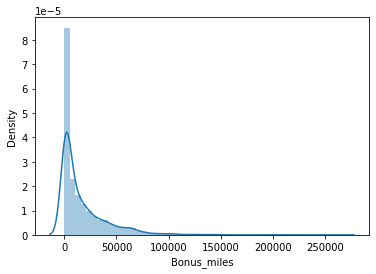

In [34]:
sns.distplot(EA['Bonus_miles'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


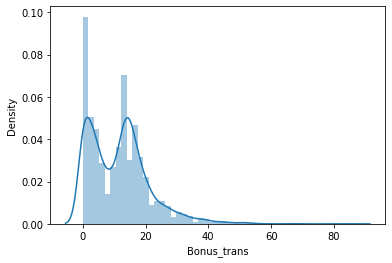

In [35]:
sns.distplot(EA['Bonus_trans'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


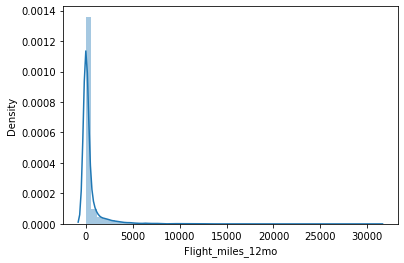

In [36]:
sns.distplot(EA['Flight_miles_12mo'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


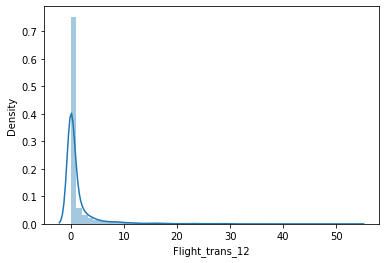

In [37]:
sns.distplot(EA['Flight_trans_12'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


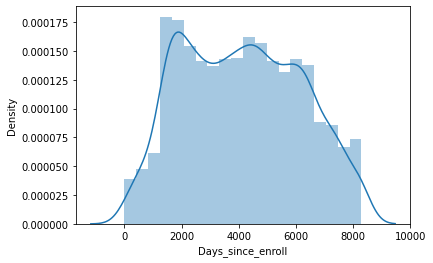

In [38]:
sns.distplot(EA['Days_since_enroll'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


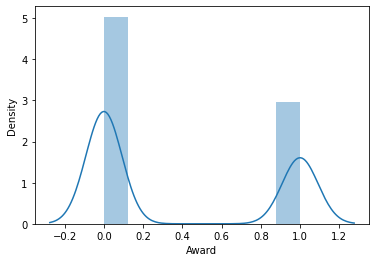

In [39]:
sns.distplot(EA['Award'])

#Normalisation the dataset on East_Airlines

In [40]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [41]:
EA_norm = norm_func(EA.iloc[:,0:])
EA_norm.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


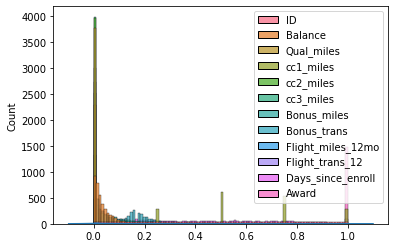

In [42]:
sns.histplot(EA_norm)
sns.distplot(EA_norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


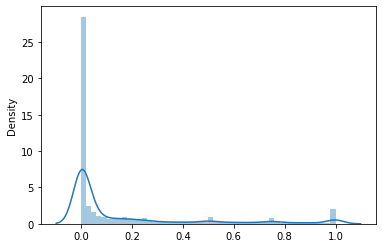

In [43]:
sns.distplot(EA_norm)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


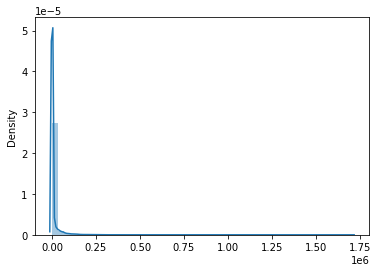

In [44]:
sns.distplot(EA)

In [45]:
EA_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3999 non-null   float64
 1   Balance            3999 non-null   float64
 2   Qual_miles         3999 non-null   float64
 3   cc1_miles          3999 non-null   float64
 4   cc2_miles          3999 non-null   float64
 5   cc3_miles          3999 non-null   float64
 6   Bonus_miles        3999 non-null   float64
 7   Bonus_trans        3999 non-null   float64
 8   Flight_miles_12mo  3999 non-null   float64
 9   Flight_trans_12    3999 non-null   float64
 10  Days_since_enroll  3999 non-null   float64
 11  Award              3999 non-null   float64
dtypes: float64(12)
memory usage: 375.0 KB


In [46]:
EA_norm.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.500950,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.288747,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251119,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.501244,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.751119,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Standardization the dataset on East_Airlines

In [47]:
def std_func(i):
 x = (i-i.min())/(i.max()-i.min())
 return (x)

In [48]:
EA_std = std_func(EA.iloc[:,0:])
EA_std.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


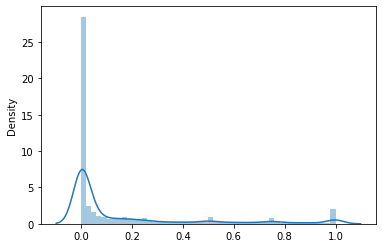

In [49]:
sns.distplot(EA_std)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


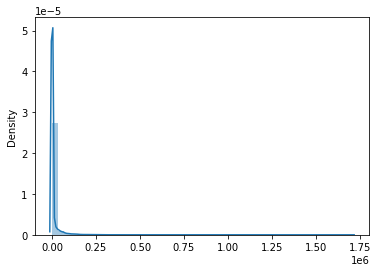

In [50]:
sns.distplot(EA)

#PCA applying on Normal And Standard dataset

In [51]:
from sklearn.decomposition import PCA
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_EA = pca_minmax.fit_transform(EA_norm)

In [52]:
print(pca_minmax.singular_values_)

[33.23903239 23.19486627 19.58010291  6.55453842]


In [53]:
PCA_normEA = np.cumsum(pca_minmax.explained_variance_ratio_*100)
PCA_normEA

array([51.05215542, 75.91215307, 93.62740274, 95.61259038])

In [54]:
from sklearn.decomposition import PCA
pca_stdEA = PCA(random_state=10, n_components=0.95)
pca_std_EA= pca_stdEA.fit_transform(EA_std)

In [55]:
print(pca_stdEA.singular_values_)

[33.23903239 23.19486627 19.58010291  6.55453842]


#KMeans

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_EA_df = scaler.fit_transform(EA.iloc[:,1:])
scaled_EA_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

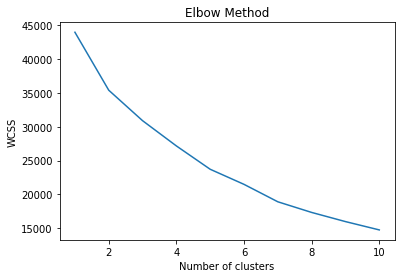

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_EA_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [58]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_EA_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [59]:
!pip install yellowbrick

model1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


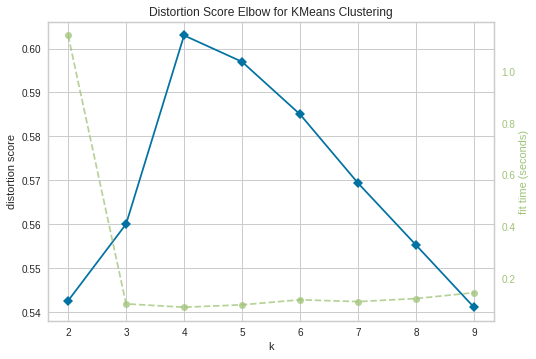

model2


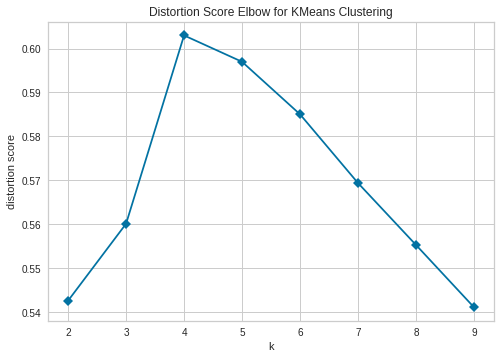

In [60]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model1 = KMeans(random_state=0,n_jobs=-1,)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20,)
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='distortion', timings=True)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='distortion', timings=False)
print('model1')
visualizer1.fit(pca_std_EA)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_EA)    
visualizer2.poof()
plt.show()

In [61]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9,]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_EA)
    sil_score1= silhouette_score(pca_std_EA, cluster_labels1)

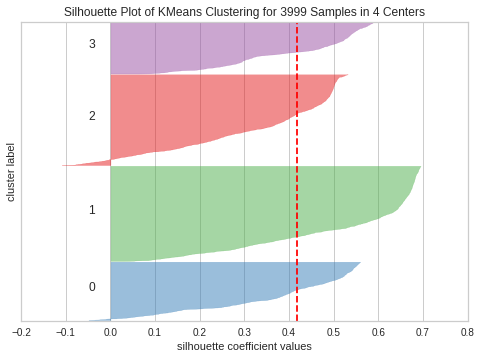

In [62]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model3 = KMeans(4)
visualizer = SilhouetteVisualizer(model3)
visualizer.fit(pca_minmax_EA)
visualizer.poof()

In [63]:
 print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 9 The average silhouette_score is : 0.4575046643991994


In [64]:
EA_KM = EA.copy()
EA_KM['clust_KM'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-0.29176319, -0.0610794 , -0.60346636,  0.03151059, -0.06076403,
        -0.5125686 , -0.48363114, -0.18668641, -0.19889788, -0.20194534,
        -0.34838022],
       [ 1.19834441,  0.82002725,  0.06242226,  0.14807116, -0.06276658,
         0.58267436,  1.59217228,  3.53177027,  3.79414404,  0.28312709,
         0.9023012 ],
       [ 0.42744458,  0.01760753,  1.20383505, -0.08212704, -0.05464204,
         0.92570487,  0.75234006, -0.0838205 , -0.09369422,  0.36975584,
         0.58462648],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [65]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(EA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [66]:
clusters_new.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int32)

In [67]:
clusters_new.cluster_centers_

array([[2.21816761e+03, 2.58752569e+04, 9.90169628e+01, 1.54967690e+00,
        1.01696284e+00, 1.00444265e+00, 8.55070517e+03, 8.66437803e+00,
        2.53737884e+02, 7.87964459e-01, 3.73394305e+03, 3.14620355e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51666952e+03, 2.06421154e+05, 3.00116809e+02, 3.02849003e+00,
        1.00569801e+00, 1.01424501e+00, 3.55406553e+04, 1.82136752e+01,
        1.04105413e+03, 2.91168091e+00, 5.04715100e+03, 4.90028490e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80802162e+03, 9.68208026e+04, 1.64924812e+02, 2.80733083e+00,
        1.01033835e+00, 1.02819549e+00, 2.76386635e+04, 1.54

In [68]:
EA_KM.groupby('clust_KM').agg(['mean']).reset_index()

,clust_KM,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2238.647612,44136.930697,97.017228,1.225920,1.019186,1.000392,4744.174628,6.943618,198.999608,0.620204,3701.218872,0.202428
1,1,1732.309091,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
2,2,1603.915415,116574.930435,157.236364,3.714625,1.002372,1.001581,39435.720158,18.817391,341.620553,1.015020,4879.030040,0.650593
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [69]:
EA_KM

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_KM
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [70]:
PCA_KM = PCA(n_components=2).fit(EA_std)
PCA_KM_EA = PCA_KM.transform(EA_std)

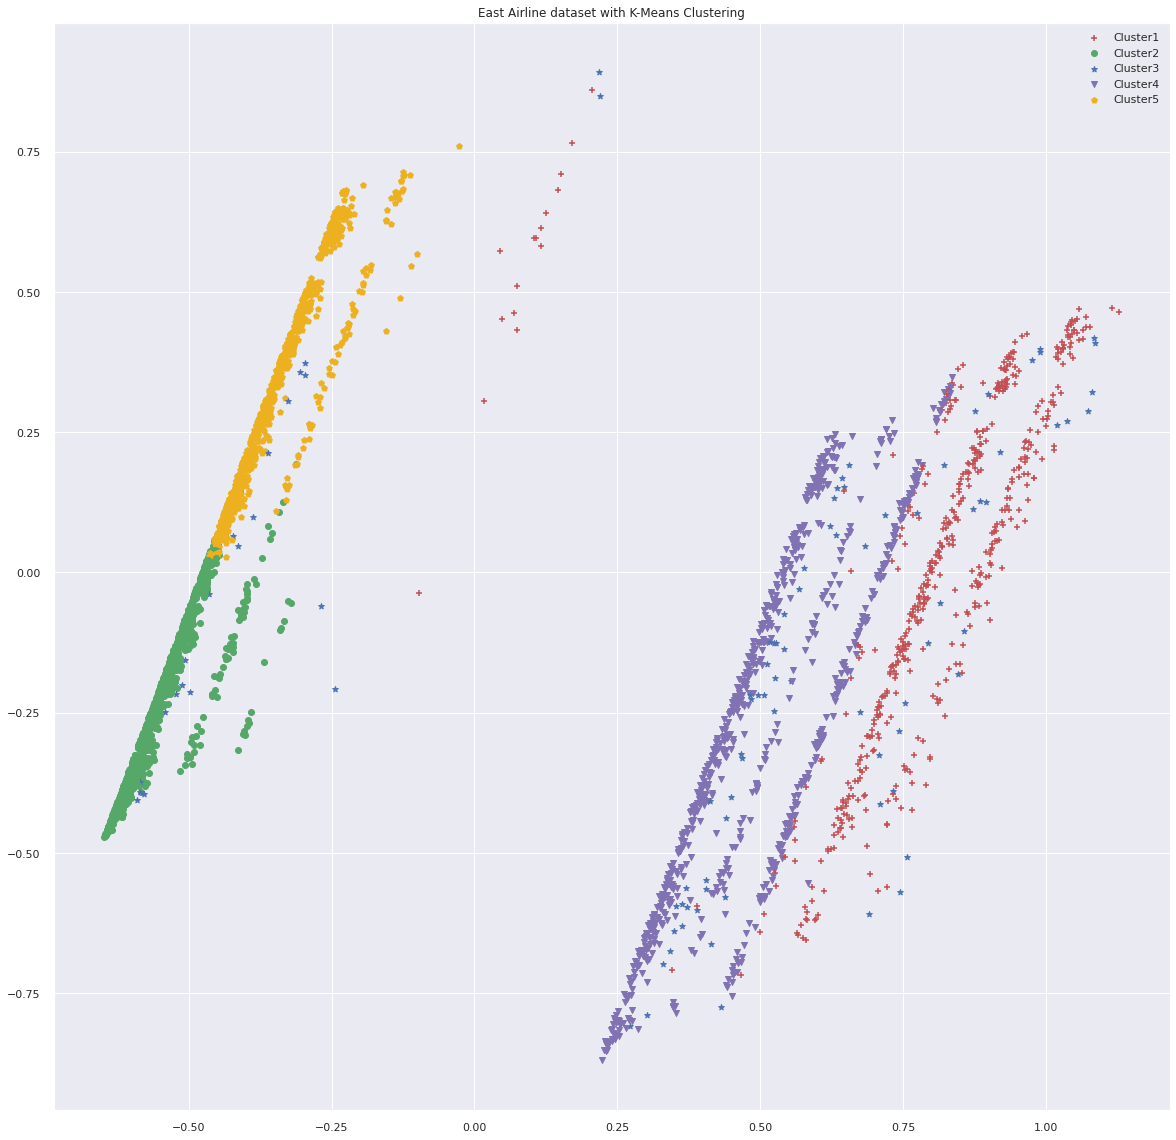

In [71]:
import pylab as pl

sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, PCA_KM_EA.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='r', marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='g', marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='b', marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='m', marker='v')
    elif kmeans.labels_[i] == 4:
        c5 = pl.scatter(PCA_KM_EA[i,0],PCA_KM_EA[i,1],c='#EDB120', marker='p')
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2','Cluster3', 'Cluster4','Cluster5'])
pl.title('East Airline dataset with K-Means Clustering')
pl.show()

#DBscan

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [73]:
DBSCAN_EA=EA.values
DBSCAN_EA

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [74]:
stscaler = StandardScaler().fit(DBSCAN_EA)
X = stscaler.transform(DBSCAN_EA)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [75]:
dbscan = DBSCAN(eps=5, min_samples=13)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=13, n_jobs=None, p=None)

In [76]:
EA_DB = EA.copy()
EA_DB['clust_DB'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[2.21816761e+03, 2.58752569e+04, 9.90169628e+01, 1.54967690e+00,
        1.01696284e+00, 1.00444265e+00, 8.55070517e+03, 8.66437803e+00,
        2.53737884e+02, 7.87964459e-01, 3.73394305e+03, 3.14620355e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51666952e+03, 2.06421154e+05, 3.00116809e+02, 3.02849003e+00,
        1.00569801e+00, 1.01424501e+00, 3.55406553e+04, 1.82136752e+01,
        1.04105413e+03, 2.91168091e+00, 5.04715100e+03, 4.90028490e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80802162e+03, 9.68208026e+04, 1.64924812e+02, 2.80733083e+00,
        1.01033835e+00, 1.02819549e+00, 2.76386635e+04, 1.54

In [77]:
clusters_new.cluster_centers_

array([[2.21816761e+03, 2.58752569e+04, 9.90169628e+01, 1.54967690e+00,
        1.01696284e+00, 1.00444265e+00, 8.55070517e+03, 8.66437803e+00,
        2.53737884e+02, 7.87964459e-01, 3.73394305e+03, 3.14620355e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51666952e+03, 2.06421154e+05, 3.00116809e+02, 3.02849003e+00,
        1.00569801e+00, 1.01424501e+00, 3.55406553e+04, 1.82136752e+01,
        1.04105413e+03, 2.91168091e+00, 5.04715100e+03, 4.90028490e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80802162e+03, 9.68208026e+04, 1.64924812e+02, 2.80733083e+00,
        1.01033835e+00, 1.02819549e+00, 2.76386635e+04, 1.54

In [78]:
stdDB=dbscan.labels_

In [79]:
EA_DB

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_DB
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


#DBscan on PCA

In [80]:
PCA_DB = PCA(n_components=2).fit(EA_std)
PCA_DB_EA = PCA_DB.transform(EA_std)

In [81]:
silhouette_score(EA_norm,stdDB)

0.10518248704944856

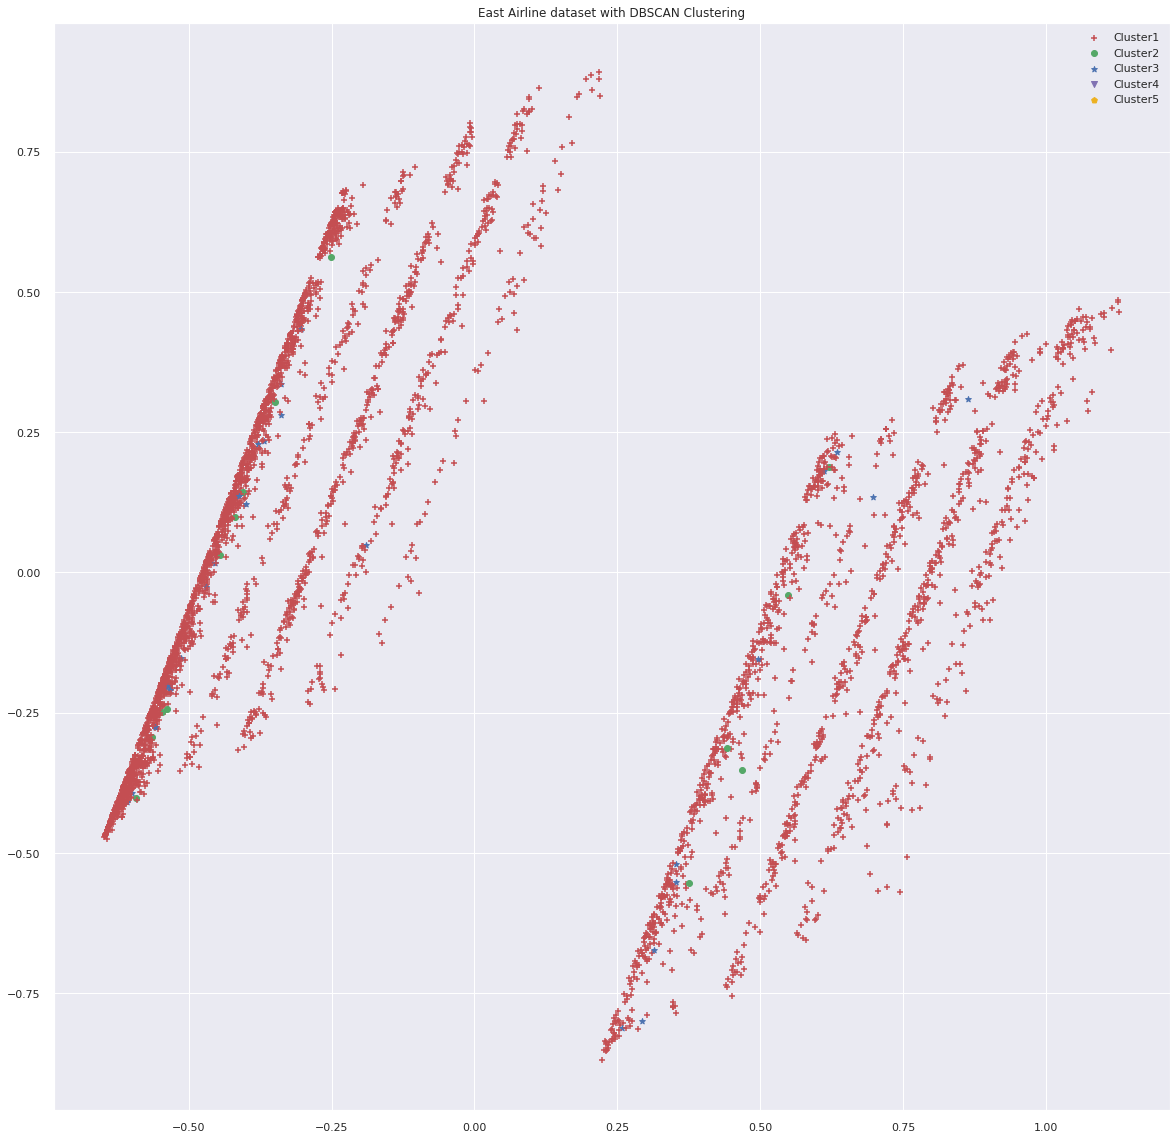

In [82]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, PCA_DB_EA.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='b', marker='*')
    elif dbscan.labels_[i] == 3:
        c4 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='m', marker='v')
    elif dbscan.labels_[i] == 4:
        c5 = pl.scatter(PCA_DB_EA[i,0],PCA_DB_EA[i,1],c='#EDB120', marker='p')
        
pl.legend([c1, c2, c3,c4, c5], ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5'])
pl.title('East Airline dataset with DBSCAN Clustering')
pl.show()

#Hierarchical Clustering

In [83]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',

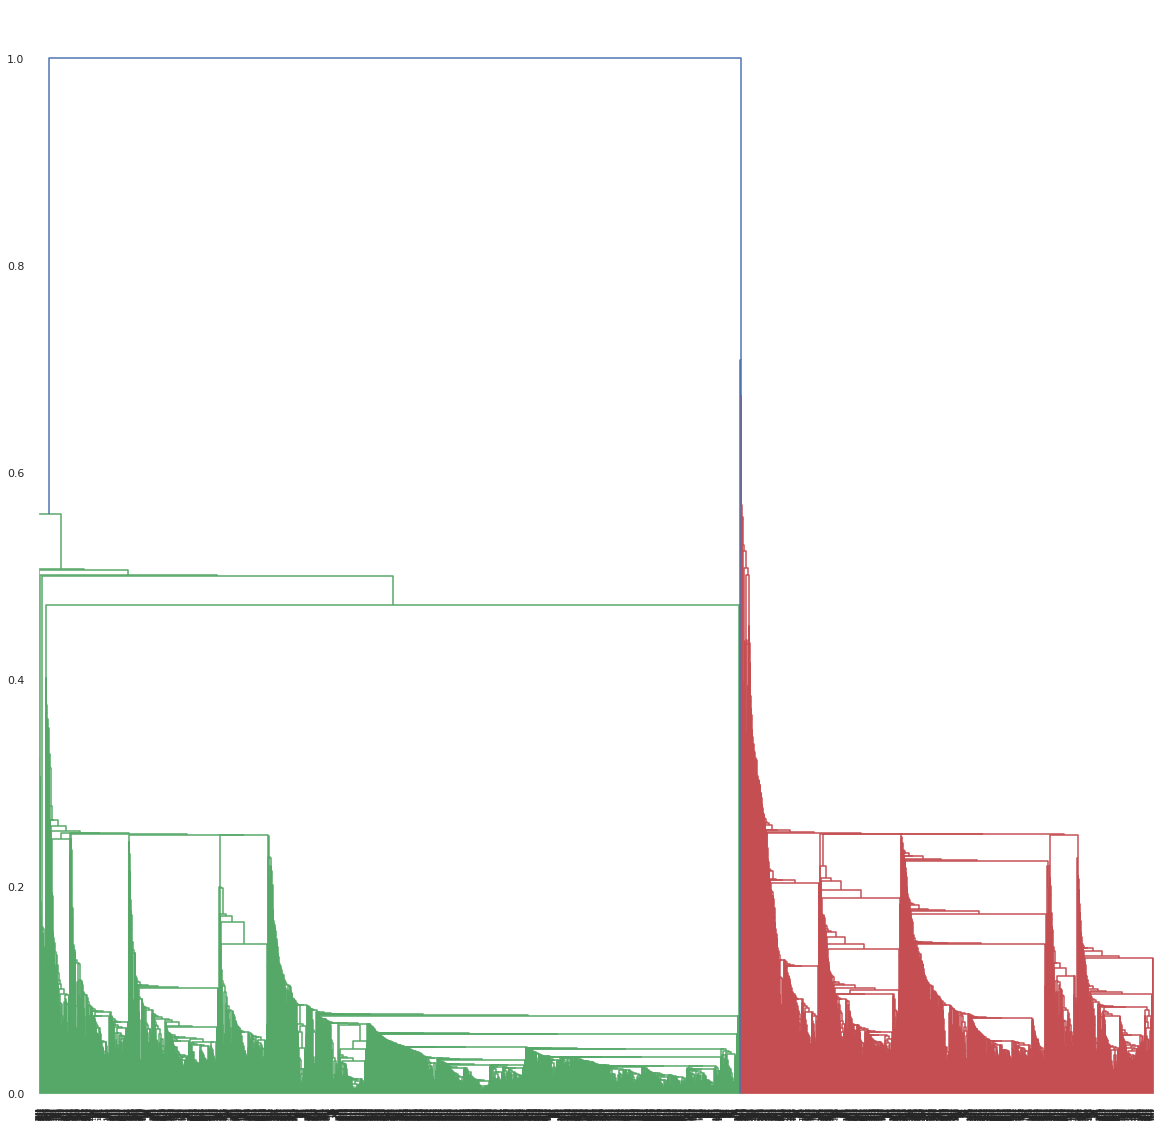

In [84]:
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='single'))
dendrogram_EA

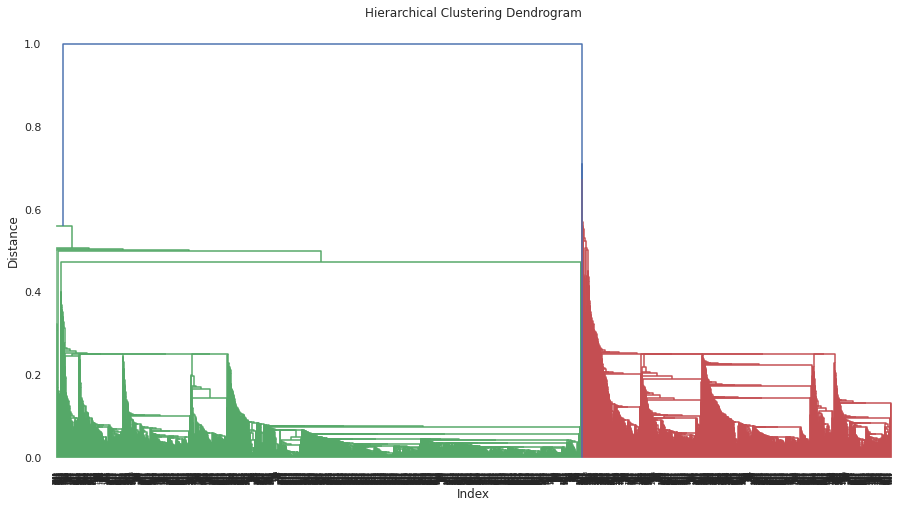

In [85]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='single'))

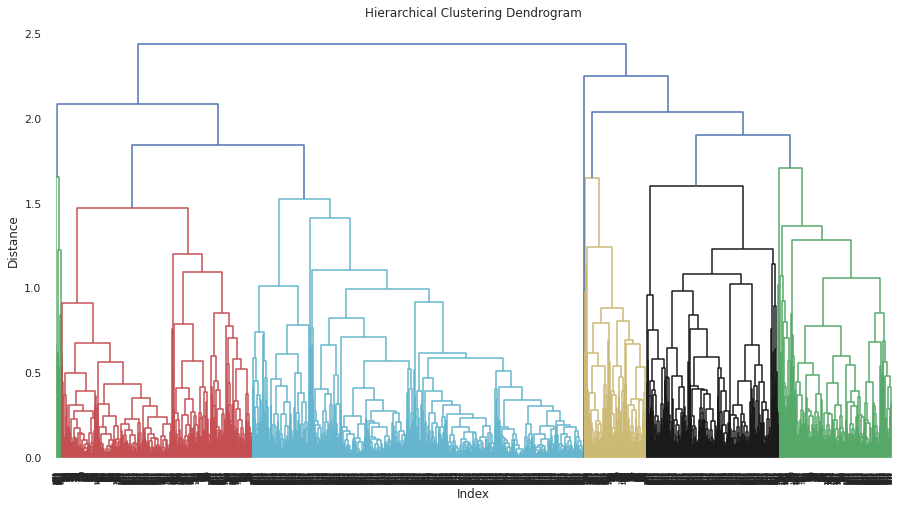

In [86]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='complete'))

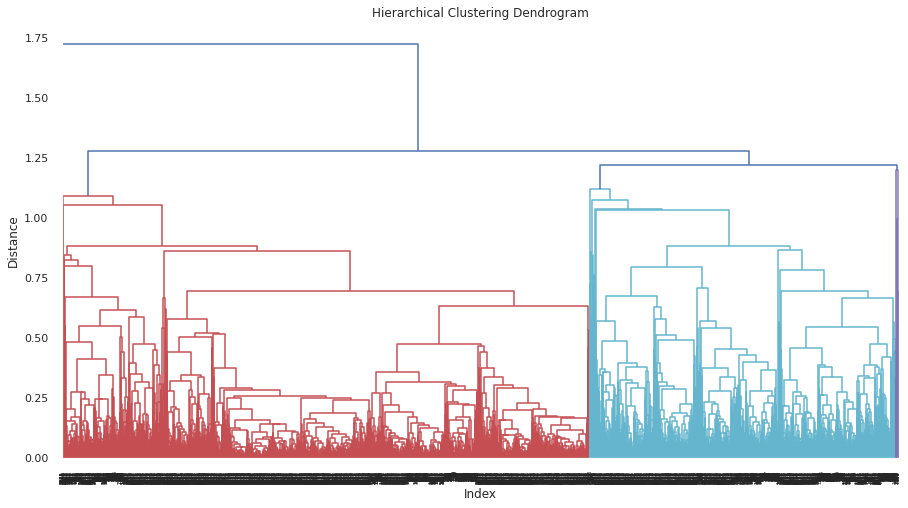

In [87]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='average'))

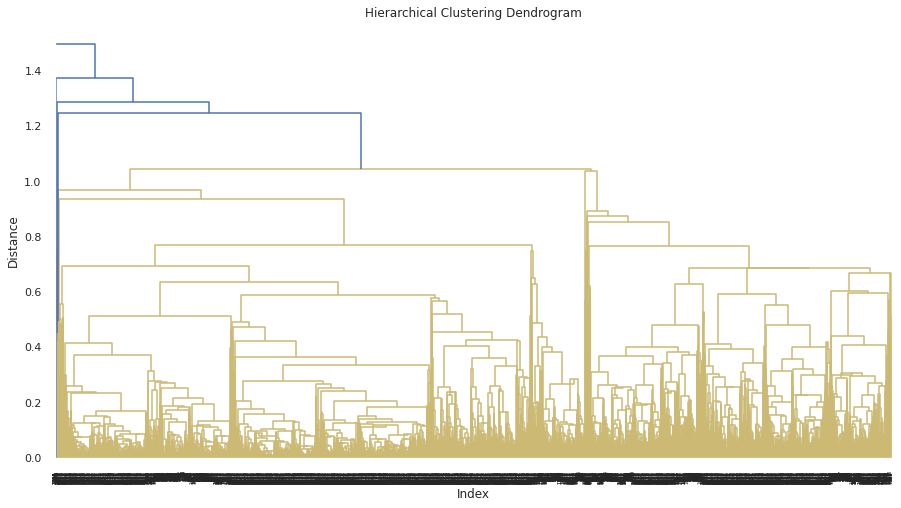

In [88]:
plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram_EA = sch.dendrogram(sch.linkage(EA_norm, method='centroid'))

In [89]:
EA_HC = EA.copy()
EA_HC['clust_HC'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[2.21816761e+03, 2.58752569e+04, 9.90169628e+01, 1.54967690e+00,
        1.01696284e+00, 1.00444265e+00, 8.55070517e+03, 8.66437803e+00,
        2.53737884e+02, 7.87964459e-01, 3.73394305e+03, 3.14620355e-01],
       [1.05087640e+03, 4.18790180e+05, 4.44910112e+02, 3.23595506e+00,
        1.03370787e+00, 1.00000000e+00, 4.94049101e+04, 1.98314607e+01,
        1.62630337e+03, 5.02247191e+00, 5.93546067e+03, 7.19101124e-01],
       [1.51666952e+03, 2.06421154e+05, 3.00116809e+02, 3.02849003e+00,
        1.00569801e+00, 1.01424501e+00, 3.55406553e+04, 1.82136752e+01,
        1.04105413e+03, 2.91168091e+00, 5.04715100e+03, 4.90028490e-01],
       [8.14000000e+02, 9.22162526e+05, 5.64736842e+02, 3.21052632e+00,
        1.00000000e+00, 1.15789474e+00, 5.84920526e+04, 2.08947368e+01,
        1.60752632e+03, 6.26315789e+00, 6.64231579e+03, 8.94736842e-01],
       [1.80802162e+03, 9.68208026e+04, 1.64924812e+02, 2.80733083e+00,
        1.01033835e+00, 1.02819549e+00, 2.76386635e+04, 1.54

In [90]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(EA_norm)

In [91]:
EA_HC.groupby('clust_HC').agg(['mean']).reset_index()

,clust_HC,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2219.085115,25914.208552,99.482856,1.551432,1.016942,1.004437,8576.924163,8.676482,255.536507,0.792658,3732.427188,0.315046
1,1,1050.876404,418790.179775,444.910112,3.235955,1.033708,1.000000,49404.910112,19.831461,1626.303371,5.022472,5935.460674,0.719101
2,2,1518.777143,206580.362857,300.974286,3.025714,1.005714,1.014286,35517.660000,18.208571,1040.600000,2.908571,5043.877143,0.491429
3,3,814.000000,922162.526316,564.736842,3.210526,1.000000,1.157895,58492.052632,20.894737,1607.526316,6.263158,6642.315789,0.894737
4,4,1803.752354,96981.021657,163.868173,2.807910,1.010358,1.028249,27646.401130,15.397363,627.866290,1.830508,4517.528249,0.420904


In [92]:
EA_HC

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [93]:
EA_norm = norm_func(EA.iloc[:,1:])

In [94]:
EA_norm['clust_HC'] = clusters_new.labels_
EA_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_HC
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,4
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,0


In [95]:
pca_agg = PCA(n_components=2).fit(EA_norm)
pca_hc_agg = pca_agg.transform(EA_norm)

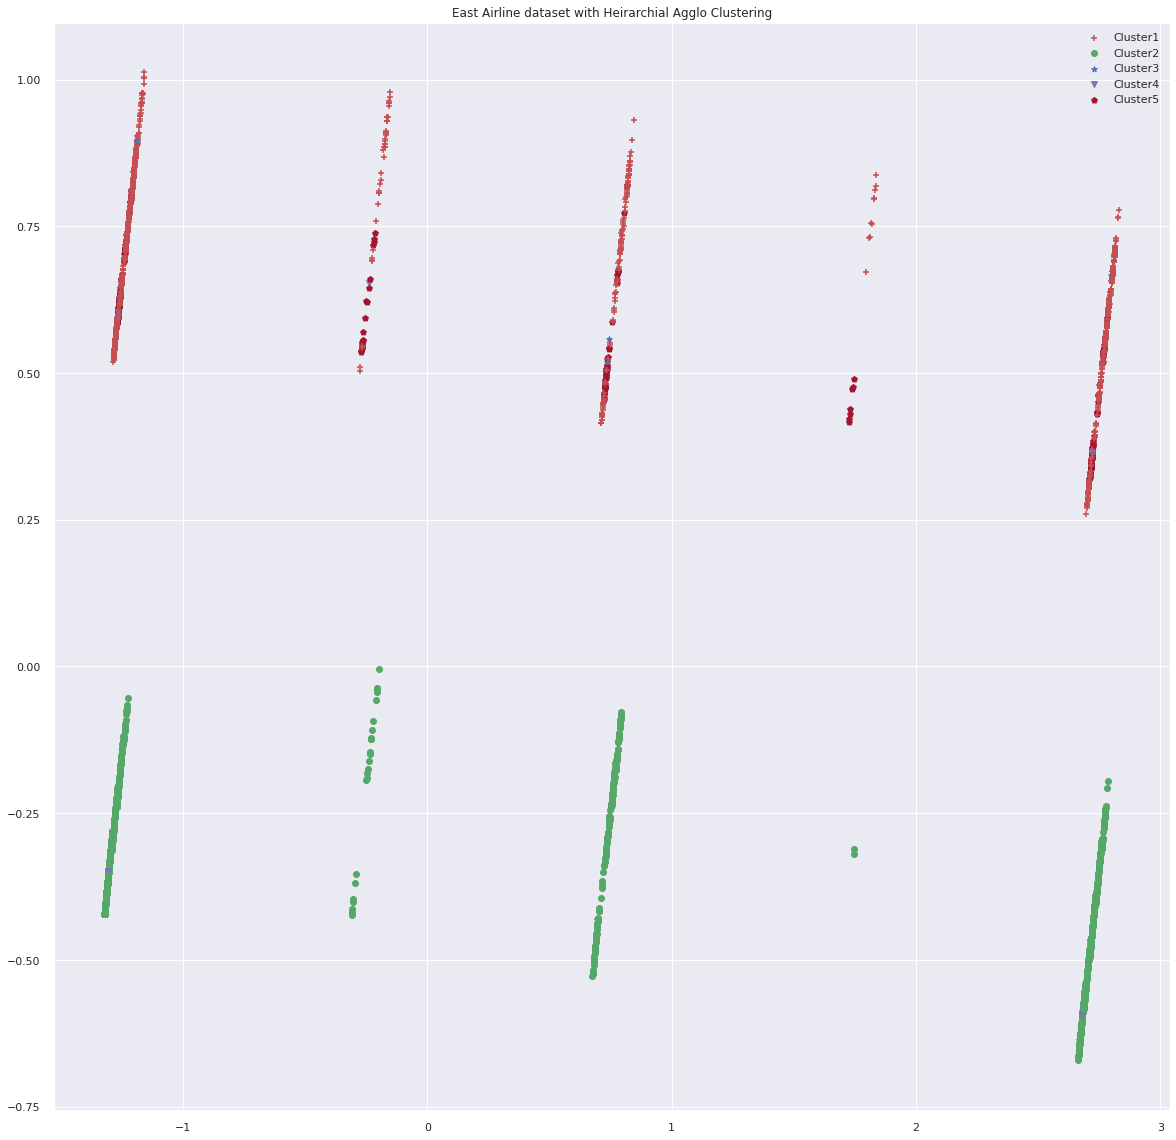

In [96]:
sns.set(rc={'figure.figsize':(20,20)})

for i in range(0, pca_hc_agg.shape[0]):
    if y_hc[i] == 0:
        c1 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='r', marker='+')
    elif y_hc[i] == 1:
        c2 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='g', marker='o')
    elif y_hc[i] == 2:
        c3 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='b', marker='*')
    elif y_hc[i] == 3:
        c4 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='m', marker='v')
    elif y_hc[i] == 4:
        c5 = pl.scatter(pca_hc_agg[i,0],pca_hc_agg[i,1],c='#A2142F', marker='p')
  
        
pl.legend([c1, c2, c3, c4, c5], ['Cluster1', 'Cluster2',
    'Cluster3', 'Cluster4','Cluster5'])
pl.title('East Airline dataset with Heirarchial Agglo Clustering')
pl.show()

In [97]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13]  
for n_clusters in n_clusters:
    for linkages in ["single","complete","average","ward"]:
        Hcluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) 
        HC_labels = Hcluster.fit_predict(pca_std_EA)
        silhouette_score1 = silhouette_score(pca_std_EA, HC_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- single : 0.48989797089909987
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4409716437124454
For n_clusters = 2 The average silhouette_score with linkage- average : 0.48989797089909987
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.48989797089909987

For n_clusters = 3 The average silhouette_score with linkage- single : 0.4685092099562149
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.4875578649017968
For n_clusters = 3 The average silhouette_score with linkage- average : 0.4639024871740154
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3813260038022785

For n_clusters = 4 The average silhouette_score with linkage- single : 0.4686094382926016
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.43430088381361587
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4424737263379366

In [98]:
EA_HC

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clust_HC
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0



Result : I Applied all(Hierarchical,KMeans,DBscan) Clustering Algorithm in above dataset of East West Airlines from that I got five clusters and High Silhouette_Score which is well matched in Hierarchical clustering.